In [24]:
from service_report import _Service_Report
from pathlib import Path
import re

In [34]:
columns = [65, 330, 350]
str_columns = [",".join(str(col) for col in columns)]
print(str_columns)

['65,330,350']


In [ ]:
class Vestas_Report(_Service_Report):
    def __init__(self, file_path):
        super().__init__(file_path)
        
        self.columns = [65, 330, 350]
        self.camelot_params = camelot_params = {
            'flavor': 'stream',
            'edge_tol': 500,
            'row_tol': 10,
            'columns': [",".join(str(col) for col in columns)]
        } 
       
    def _find_starting_page():
        """Search for 'Service Inspection Form' which begins the table in the doc and return the page number"""
        for page_num in range(self.page_numbers):
            if "Service Inspection Form" in opened_doc[page_num].get_text():
                return page_num
        raise ValueError("'Service Inspection Form' non trouvé dans le document")
        
    def get_header_informations(self):
        first_page = super()._get_page(0)
        
        turbine_number = re.search(r'Turbine No\./Id:\s*(\d+)', first_page).group(1) if re.search(r'Turbine No\./Id:\s*(\d+)', first_page) else None
        service_order = re.search(r'Service Order:\s*(\d+)', first_page).group(1) if re.search(r'Service Order:\s*(\d+)', first_page) else None
        pad_no = (match.group(1).strip() if (match := re.search(r'PAD No\.\s*([^\n]+)', first_page)) else None)
        turbine_type = re.search(r'Turbine Type:\s*([\w\d]+)', first_page).group(1) if re.search(r'Turbine Type:\s*([\w\d]+)', first_page) else None
        start_date = re.search(r'Start Date:\s*([\d\.]+)', first_page).group(1) if re.search(r'Start Date:\s*([\d\.]+)', first_page) else None
        end_date = (match.group(1) if (match := re.search(r'End Date:\s*([\d\.]+)', first_page)) else None)
        date_and_time_of_receipt = (match.group(1).strip() if (match := re.search(r'Date & Time of Receipt\s*([\d\.\s:]+)', first_page)) else None)
        reason_for_call_out = (match.group(1) if (match := re.search(r'Reason for Call Out:\s*([^\n]+)', first_page)) else None)
                
        customer_address = ([line.strip() for line in match.group(1).split('\n') if line.strip()] 
                       if (match := re.search(r"Customer's Address:\s*(.*?)Site's Address:", first_page, re.DOTALL)) 
                       else None)
        
        header_informations = {
            'turbine_number': turbine_number,
            'service_order': service_order,
            'pad_no': pad_no,
            'turbine_type': turbine_type,
            'start_date': start_date,
            'customer_address': customer_address,
            'date_and_time_of_receipt': date_and_time_of_receipt,
            'reason_for_call_out': reason_for_call_out
        }
        
        return header_informations
    

    
    def plot_column_lines(page_number: int):
        table = super()._extract_single_page_table(
            page_number=page_number,
            **self.camelot_params
        )
        super()._plot_column_lines()
        
    

In [26]:
folder_path = "data"
file_name = 'HOUSSET_1_RON2_Check_ICPE_Electrical_V136_2023-10-17_61140280.pdf'
file_path = Path(folder_path) / file_name

In [27]:
pdf_test = Vestas_Report(file_path)

In [36]:
pdf_test.get_header_informations()

{'turbine_number': '232085',
 'service_order': '61140280',
 'pad_no': 'HOUSSET 1 RON2',
 'turbine_type': 'V136',
 'start_date': '17.10.2023',
 'customer_address': ['ENERGIE DES RONCHERES',
  '29 rue des Rosati',
  'F-62000 ARRAS'],
 'date_and_time_of_receipt': '19.03.2023 22:15:02',
 'reason_for_call_out': 'Check ICPE Electrical V136'}

In [30]:
doc = pdf_test._open()
pdf_test._convert_to_dataframe(pdf_test._extract_single_page_table(page_number=2, 
    flavor='stream',
    edge_tol=500,
    row_tol=10,
    columns=['65,330,350']))

,0,1,2,3
0,,,232085,61140280
1,Service Inspection Form,,,
2,0010,Check ICPE Electrical V112-3MW,,
3,0,eSIF,,
4,0.01,0. DMS: 0093-0083 V03,,
5,1,Safety,,
6,1.01,Two persons present. ...,,
7,1.02,Trained in and aware of the contents of the Ve...,OK,
8,,Manual including ‘Working with Hazardous Mater...,,
9,,Regulations for Operators and Technicians.,,


<Figure size 640x480 with 0 Axes>

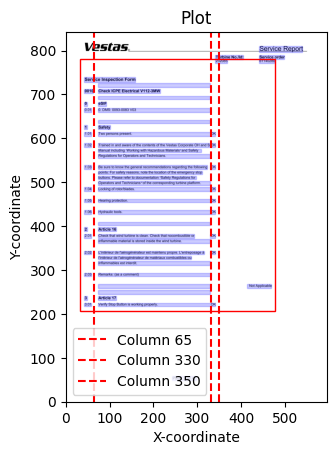

In [31]:
pdf_test.plot_column_lines(pdf_test._extract_single_page_table(page_number=2, 
    flavor='stream',
    edge_tol=500,
    row_tol=10,
    columns=['65,330,350']), [65,330,350], title="Plot")

In [32]:
pdf_test._extract_multiple_pages_table(2, 4,
    flavor='stream',
    edge_tol=500,
    row_tol=10,
    columns=['65,330,350'])

,0,1,2,3
0,,,232085,61140280
1,Service Inspection Form,,,
2,0010,Check ICPE Electrical V112-3MW,,
3,0,eSIF,,
4,0.01,0. DMS: 0093-0083 V03,,
...,...,...,...,...
56,,,Turbine No./Id:\n232085,Service order\n61140280
57,4.07,"Si installés, contrôle du bon fonctionnement d...",,
58,4.08,Remarks: (as a comment),,
59,,,,Not Applicable
